In [1]:
import requests
import datetime

In [2]:
# Set up the API key and base URL
api_key = '944b39fc4c1d44e5bb0dce19bb68878d'  
base_url = 'https://api.football-data.org/v4/competitions/PL/matches'


In [3]:
# Set up the headers including the API key
headers = {
    'X-Auth-Token': api_key
}
headers

{'X-Auth-Token': '944b39fc4c1d44e5bb0dce19bb68878d'}

In [4]:
# Make the API request
response = requests.get(base_url, headers=headers)
response

<Response [200]>

In [5]:
# Check if the request was successful
if response.status_code == 200:
    print("Data retrieved successfully!")
    data = response.json()  # Convert the response to a JSON object
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Data retrieved successfully!


# --- Data Transformations and Cleaning ---

In [6]:
# Print some of the match data (for verification)
matches = data.get('matches', [])
for match in matches[:5]:  # Print the first 5 matches
    print(f"Match: {match['homeTeam']['name']} vs {match['awayTeam']['name']}")
    #print(f"Score: {match['score']['fullTime']['homeTeam']} - {match['score']['fullTime']['awayTeam']}")
    print(f"Date: {match['utcDate']}\n")

Match: Manchester United FC vs Fulham FC
Date: 2024-08-16T19:00:00Z

Match: Ipswich Town FC vs Liverpool FC
Date: 2024-08-17T11:30:00Z

Match: Arsenal FC vs Wolverhampton Wanderers FC
Date: 2024-08-17T14:00:00Z

Match: Everton FC vs Brighton & Hove Albion FC
Date: 2024-08-17T14:00:00Z

Match: Newcastle United FC vs Southampton FC
Date: 2024-08-17T14:00:00Z



In [7]:
# Inspect the structure of one match
if matches:
    print(matches[0])  # Print the structure of the first match
else:
    print("No matches found in the data.")


{'area': {'id': 2072, 'name': 'England', 'code': 'ENG', 'flag': 'https://crests.football-data.org/770.svg'}, 'competition': {'id': 2021, 'name': 'Premier League', 'code': 'PL', 'type': 'LEAGUE', 'emblem': 'https://crests.football-data.org/PL.png'}, 'season': {'id': 2287, 'startDate': '2024-08-16', 'endDate': '2025-05-25', 'currentMatchday': 12, 'winner': None}, 'id': 497410, 'utcDate': '2024-08-16T19:00:00Z', 'status': 'FINISHED', 'matchday': 1, 'stage': 'REGULAR_SEASON', 'group': None, 'lastUpdated': '2024-11-16T00:20:53Z', 'homeTeam': {'id': 66, 'name': 'Manchester United FC', 'shortName': 'Man United', 'tla': 'MUN', 'crest': 'https://crests.football-data.org/66.png'}, 'awayTeam': {'id': 63, 'name': 'Fulham FC', 'shortName': 'Fulham', 'tla': 'FUL', 'crest': 'https://crests.football-data.org/63.png'}, 'score': {'winner': 'HOME_TEAM', 'duration': 'REGULAR', 'fullTime': {'home': 1, 'away': 0}, 'halfTime': {'home': 0, 'away': 0}}, 'odds': {'msg': 'Activate Odds-Package in User-Panel to r

In [8]:
for match in matches[:5]:  # Print the first 5 matches
    home_team = match.get('homeTeam', {}).get('name', 'Unknown')
    away_team = match.get('awayTeam', {}).get('name', 'Unknown')
    home_score = match.get('score', {}).get('fullTime', {}).get('homeTeam', 'N/A')
    away_score = match.get('score', {}).get('fullTime', {}).get('awayTeam', 'N/A')
    match_date = match.get('utcDate', 'Unknown Date')
    
    print(f"Match: {home_team} vs {away_team}")
    print(f"Score: {home_score} - {away_score}")
    print(f"Date: {match_date}\n")


Match: Manchester United FC vs Fulham FC
Score: N/A - N/A
Date: 2024-08-16T19:00:00Z

Match: Ipswich Town FC vs Liverpool FC
Score: N/A - N/A
Date: 2024-08-17T11:30:00Z

Match: Arsenal FC vs Wolverhampton Wanderers FC
Score: N/A - N/A
Date: 2024-08-17T14:00:00Z

Match: Everton FC vs Brighton & Hove Albion FC
Score: N/A - N/A
Date: 2024-08-17T14:00:00Z

Match: Newcastle United FC vs Southampton FC
Score: N/A - N/A
Date: 2024-08-17T14:00:00Z



In [9]:
# Save the data for further analysis
import pandas as pd
df = pd.DataFrame(matches)
df.head()


,area,awayTeam,competition,group,homeTeam,id,lastUpdated,matchday,odds,referees,score,season,stage,status,utcDate
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham FC', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United FC', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16T19:00:00Z
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool FC', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town FC', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T11:30:00Z
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers FC...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal FC', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T14:00:00Z
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion FC...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton FC', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T14:00:00Z
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton FC', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United FC', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T14:00:00Z


In [10]:
# Extract the 'matches' data
matches = data.get('matches', [])
matches

[{'area': {'id': 2072,
   'name': 'England',
   'code': 'ENG',
   'flag': 'https://crests.football-data.org/770.svg'},
  'competition': {'id': 2021,
   'name': 'Premier League',
   'code': 'PL',
   'type': 'LEAGUE',
   'emblem': 'https://crests.football-data.org/PL.png'},
  'season': {'id': 2287,
   'startDate': '2024-08-16',
   'endDate': '2025-05-25',
   'currentMatchday': 12,
   'winner': None},
  'id': 497410,
  'utcDate': '2024-08-16T19:00:00Z',
  'status': 'FINISHED',
  'matchday': 1,
  'stage': 'REGULAR_SEASON',
  'group': None,
  'lastUpdated': '2024-11-16T00:20:53Z',
  'homeTeam': {'id': 66,
   'name': 'Manchester United FC',
   'shortName': 'Man United',
   'tla': 'MUN',
   'crest': 'https://crests.football-data.org/66.png'},
  'awayTeam': {'id': 63,
   'name': 'Fulham FC',
   'shortName': 'Fulham',
   'tla': 'FUL',
   'crest': 'https://crests.football-data.org/63.png'},
  'score': {'winner': 'HOME_TEAM',
   'duration': 'REGULAR',
   'fullTime': {'home': 1, 'away': 0},
   'ha

In [11]:
# Standardize Headers - Rename JSON keys to a more readable format
# Renaming keys for better readability and consistency
for match in matches:
    match['home_team'] = match.pop('homeTeam')
    match['away_team'] = match.pop('awayTeam')
    match['match_date'] = match.pop('utcDate')
    match['score_full_time'] = match['score'].get('fullTime', {})

In [12]:
#  Format Date - Convert match_date to a human-readable format
# This step ensures that date values are in a uniform and readable format
for match in matches:
    match['match_date'] = datetime.datetime.fromisoformat(match['match_date'].replace('Z', '')).strftime('%Y-%m-%d %H:%M:%S')


In [13]:
#  Fix Casing - Standardize team names and other text fields to title case
# This transformation step ensures uniformity in text data, improving readability
for match in matches:
    match['home_team']['name'] = match['home_team']['name'].title()
    match['away_team']['name'] = match['away_team']['name'].title()

In [14]:
# Remove Duplicates - Identify and remove duplicate matches
# Checking for duplicates based on team names and match date
unique_matches = []
seen_matches = set()

for match in matches:
    match_id = (match['home_team']['name'], match['away_team']['name'], match['match_date'])
    if match_id not in seen_matches:
        seen_matches.add(match_id)
        unique_matches.append(match)

matches = unique_matches

In [15]:
# Display a cleaned sample of the transformed matches data
for match in matches[:10]:  # Show first 5 entries as a sample
    print(f"Match: {match['home_team']['name']} vs {match['away_team']['name']}")
    print(f"Score: {match['score_full_time']}")
    print(f"Date: {match['match_date']}\n")


Match: Manchester United Fc vs Fulham Fc
Score: {'home': 1, 'away': 0}
Date: 2024-08-16 19:00:00

Match: Ipswich Town Fc vs Liverpool Fc
Score: {'home': 0, 'away': 2}
Date: 2024-08-17 11:30:00

Match: Arsenal Fc vs Wolverhampton Wanderers Fc
Score: {'home': 2, 'away': 0}
Date: 2024-08-17 14:00:00

Match: Everton Fc vs Brighton & Hove Albion Fc
Score: {'home': 0, 'away': 3}
Date: 2024-08-17 14:00:00

Match: Newcastle United Fc vs Southampton Fc
Score: {'home': 1, 'away': 0}
Date: 2024-08-17 14:00:00

Match: Nottingham Forest Fc vs Afc Bournemouth
Score: {'home': 1, 'away': 1}
Date: 2024-08-17 14:00:00

Match: West Ham United Fc vs Aston Villa Fc
Score: {'home': 1, 'away': 2}
Date: 2024-08-17 16:30:00

Match: Brentford Fc vs Crystal Palace Fc
Score: {'home': 2, 'away': 1}
Date: 2024-08-18 13:00:00

Match: Chelsea Fc vs Manchester City Fc
Score: {'home': 0, 'away': 2}
Date: 2024-08-18 15:30:00

Match: Leicester City Fc vs Tottenham Hotspur Fc
Score: {'home': 1, 'away': 1}
Date: 2024-08-19

In [16]:
df.head()

,area,awayTeam,competition,group,homeTeam,id,lastUpdated,matchday,odds,referees,score,season,stage,status,utcDate
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16T19:00:00Z
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T11:30:00Z
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T14:00:00Z
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T14:00:00Z
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17T14:00:00Z


In [17]:
# Check data types and count of missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 15 columns):
area           380 non-null object
awayTeam       380 non-null object
competition    380 non-null object
group          0 non-null object
homeTeam       380 non-null object
id             380 non-null int64
lastUpdated    380 non-null object
matchday       380 non-null int64
odds           380 non-null object
referees       380 non-null object
score          380 non-null object
season         380 non-null object
stage          380 non-null object
status         380 non-null object
utcDate        380 non-null object
dtypes: int64(2), object(13)
memory usage: 44.6+ KB


area             0
awayTeam         0
competition      0
group          380
homeTeam         0
id               0
lastUpdated      0
matchday         0
odds             0
referees         0
score            0
season           0
stage            0
status           0
utcDate          0
dtype: int64

In [18]:
# Summary statistics for numerical columns
df.describe()


,id,matchday
count,380.000000,380.000000
mean,497599.500000,19.500000
std,109.840794,10.980313
min,497410.000000,1.000000
25%,497504.750000,10.000000
50%,497599.500000,19.500000
75%,497694.250000,29.000000
max,497789.000000,38.000000


In [19]:
print(df.columns)


Index(['area', 'awayTeam', 'competition', 'group', 'homeTeam', 'id',
       'lastUpdated', 'matchday', 'odds', 'referees', 'score', 'season',
       'stage', 'status', 'utcDate'],
      dtype='object')


In [20]:
# Renaming a column
df.rename(columns={'utcDate': 'match_date'}, inplace=True)  # Adjust 'utcDate' if it's the correct column

# Alternatively, if it's nested:
if 'match' in df and isinstance(df['match'], list):  # Replace 'match' with the correct key if nested
    df['match_date'] = [m['utcDate'] for m in df['match']]


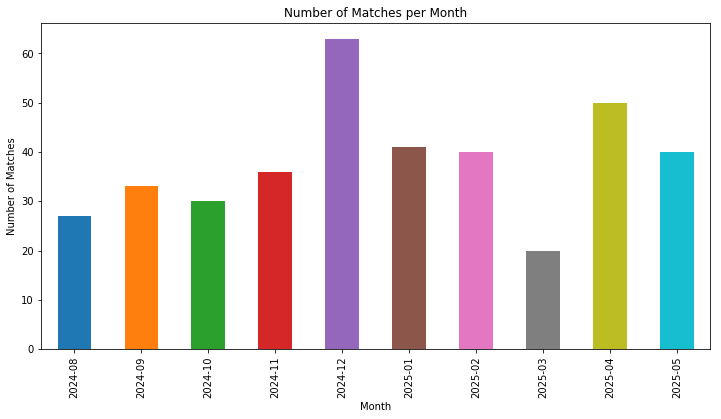

In [23]:
# Distribution of Match Dates
import matplotlib.pyplot as plt

# Convert match_date to datetime if it isn't already
df['match_date'] = pd.to_datetime(df['match_date'])

# Plot match count over time
df['match_date'].dt.to_period("M").value_counts().sort_index().plot(kind="bar", figsize=(12,6))
plt.title("Number of Matches per Month")
plt.xlabel("Month")
plt.ylabel("Number of Matches")
plt.show()


In [24]:
print(df.columns)


Index(['area', 'awayTeam', 'competition', 'group', 'homeTeam', 'id',
       'lastUpdated', 'matchday', 'odds', 'referees', 'score', 'season',
       'stage', 'status', 'match_date'],
      dtype='object')


In [25]:
#Distribution of Scores

# Extract 'home' and 'away' scores from nested dictionaries in the 'score' column if it's nested
df['home_score'] = df['score'].apply(lambda x: x.get('fullTime', {}).get('home') if isinstance(x, dict) else None)
df['away_score'] = df['score'].apply(lambda x: x.get('fullTime', {}).get('away') if isinstance(x, dict) else None)


In [26]:
print(df[['home_score', 'away_score']].head())


   home_score  away_score
0         1.0         0.0
1         0.0         2.0
2         2.0         0.0
3         0.0         3.0
4         1.0         0.0


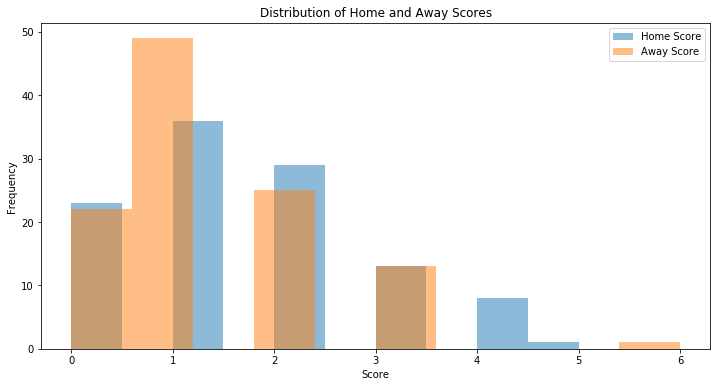

In [27]:
# Plot distributions of scores
plt.figure(figsize=(12, 6))
plt.hist(df['home_score'].dropna(), alpha=0.5, label='Home Score')
plt.hist(df['away_score'].dropna(), alpha=0.5, label='Away Score')
plt.legend(loc='upper right')
plt.title("Distribution of Home and Away Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


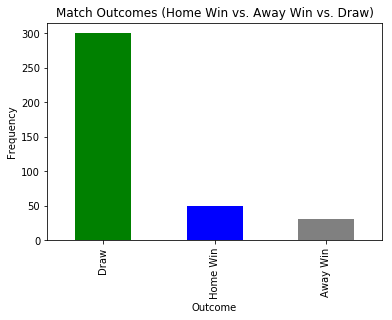

In [29]:
#Home vs. Away Wins Analysis
# Create a new column for the match result
df['match_result'] = df.apply(lambda x: 'Home Win' if x['home_score'] > x['away_score'] 
                              else 'Away Win' if x['home_score'] < x['away_score'] else 'Draw', axis=1)

# Plot distribution of match outcomes
df['match_result'].value_counts().plot(kind='bar', color=['green', 'blue', 'grey'])
plt.title("Match Outcomes (Home Win vs. Away Win vs. Draw)")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.show()


In [30]:
print(df.head())
print(df.columns)


                                                area  \
0  {'id': 2072, 'name': 'England', 'code': 'ENG',...   
1  {'id': 2072, 'name': 'England', 'code': 'ENG',...   
2  {'id': 2072, 'name': 'England', 'code': 'ENG',...   
3  {'id': 2072, 'name': 'England', 'code': 'ENG',...   
4  {'id': 2072, 'name': 'England', 'code': 'ENG',...   

                                            awayTeam  \
0  {'id': 63, 'name': 'Fulham Fc', 'shortName': '...   
1  {'id': 64, 'name': 'Liverpool Fc', 'shortName'...   
2  {'id': 76, 'name': 'Wolverhampton Wanderers Fc...   
3  {'id': 397, 'name': 'Brighton & Hove Albion Fc...   
4  {'id': 340, 'name': 'Southampton Fc', 'shortNa...   

                                         competition group  \
0  {'id': 2021, 'name': 'Premier League', 'code':...  None   
1  {'id': 2021, 'name': 'Premier League', 'code':...  None   
2  {'id': 2021, 'name': 'Premier League', 'code':...  None   
3  {'id': 2021, 'name': 'Premier League', 'code':...  None   
4  {'id': 2021, 

In [31]:
print(df.columns)


Index(['area', 'awayTeam', 'competition', 'group', 'homeTeam', 'id',
       'lastUpdated', 'matchday', 'odds', 'referees', 'score', 'season',
       'stage', 'status', 'match_date', 'home_score', 'away_score',
       'match_result'],
      dtype='object')


In [32]:
# Extract team names from the nested dictionaries in the 'homeTeam' and 'awayTeam' columns
df['home_team_name'] = df['homeTeam'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
df['away_team_name'] = df['awayTeam'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# Verify that the columns have been created
print(df[['home_team_name', 'away_team_name']].head())


         home_team_name              away_team_name
0  Manchester United Fc                   Fulham Fc
1       Ipswich Town Fc                Liverpool Fc
2            Arsenal Fc  Wolverhampton Wanderers Fc
3            Everton Fc   Brighton & Hove Albion Fc
4   Newcastle United Fc              Southampton Fc


In [33]:
# Count of matches for each team
top_home_teams = df['home_team_name'].value_counts().head(10)
top_away_teams = df['away_team_name'].value_counts().head(10)

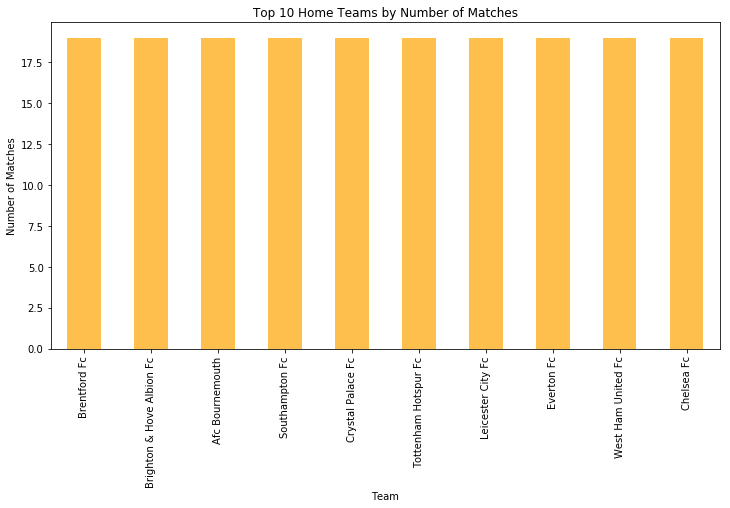

In [34]:
# Plot top home teams
plt.figure(figsize=(12, 6))
top_home_teams.plot(kind="bar", color='orange', alpha=0.7)
plt.title("Top 10 Home Teams by Number of Matches")
plt.xlabel("Team")
plt.ylabel("Number of Matches")
plt.show()

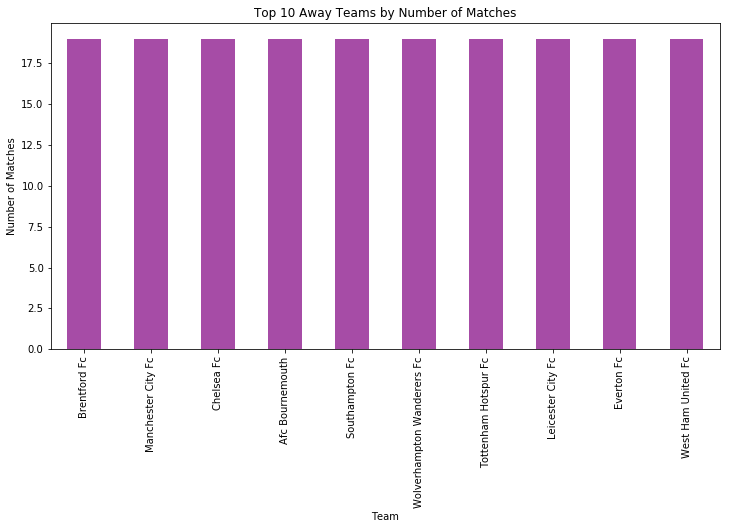

In [35]:
# Plot top away teams
plt.figure(figsize=(12, 6))
top_away_teams.plot(kind="bar", color='purple', alpha=0.7)
plt.title("Top 10 Away Teams by Number of Matches")
plt.xlabel("Team")
plt.ylabel("Number of Matches")
plt.show()

In [36]:
df.head()

,area,awayTeam,competition,group,homeTeam,id,lastUpdated,matchday,odds,referees,score,season,stage,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc


In [37]:
# Replace headers with more descriptive names
df.rename(columns={
    'homeTeam': 'home_team',
    'awayTeam': 'away_team',
    'utcDate': 'match_date',
    'score': 'score_details'
}, inplace=True)
df.head()

,area,away_team,competition,group,home_team,id,lastUpdated,matchday,odds,referees,score_details,season,stage,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc


In [38]:
# Convert match_date to a readable datetime format
df['match_date'] = pd.to_datetime(df['match_date'])

# Extract home and away scores if nested in score_details
df['home_score'] = df['score_details'].apply(lambda x: x.get('fullTime', {}).get('home') if isinstance(x, dict) else None)
df['away_score'] = df['score_details'].apply(lambda x: x.get('fullTime', {}).get('away') if isinstance(x, dict) else None)
df.head()

,area,away_team,competition,group,home_team,id,lastUpdated,matchday,odds,referees,score_details,season,stage,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc


In [39]:
# Define a threshold for high scores, e.g., above 10 goals as outliers
high_scores = df[(df['home_score'] > 10) | (df['away_score'] > 10)]
print("Potential outliers in scores:")
print(high_scores)


Potential outliers in scores:
Empty DataFrame
Columns: [area, away_team, competition, group, home_team, id, lastUpdated, matchday, odds, referees, score_details, season, stage, status, match_date, home_score, away_score, match_result, home_team_name, away_team_name]
Index: []


In [40]:
print(df[['home_team_name', 'away_team_name']].head())


         home_team_name              away_team_name
0  Manchester United Fc                   Fulham Fc
1       Ipswich Town Fc                Liverpool Fc
2            Arsenal Fc  Wolverhampton Wanderers Fc
3            Everton Fc   Brighton & Hove Albion Fc
4   Newcastle United Fc              Southampton Fc


In [41]:
# Remove duplicates based on home_team_name, away_team_name, and match_date
df.drop_duplicates(subset=['home_team_name', 'away_team_name', 'match_date'], inplace=True)
df.head(5)

,area,away_team,competition,group,home_team,id,lastUpdated,matchday,odds,referees,score_details,season,stage,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc


In [42]:
# Standardize team names to title case
df['home_team_name'] = df['home_team'].apply(lambda x: x['name'].title() if isinstance(x, dict) else None)
df['away_team_name'] = df['away_team'].apply(lambda x: x['name'].title() if isinstance(x, dict) else None)
df.head()

,area,away_team,competition,group,home_team,id,lastUpdated,matchday,odds,referees,score_details,season,stage,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...","{'winner': 'AWAY_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...","{'winner': 'HOME_TEAM', 'duration': 'REGULAR',...","{'id': 2287, 'startDate': '2024-08-16', 'endDa...",REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc


In [43]:
# Extract details from the 'competition' column
df['competition_name'] = df['competition'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
df['competition_code'] = df['competition'].apply(lambda x: x['code'] if isinstance(x, dict) else None)
df['competition_type'] = df['competition'].apply(lambda x: x['type'] if isinstance(x, dict) else None)
df.head()


,area,away_team,competition,group,home_team,id,lastUpdated,matchday,odds,referees,...,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name,competition_name,competition_code,competition_type
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...",...,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc,Premier League,PL,LEAGUE
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...",...,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc,Premier League,PL,LEAGUE
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...",...,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc,Premier League,PL,LEAGUE
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...",...,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc,Premier League,PL,LEAGUE
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...",...,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc,Premier League,PL,LEAGUE


In [44]:
# Extract details from the 'area' column
df['area_name'] = df['area'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
df['area_code'] = df['area'].apply(lambda x: x['code'] if isinstance(x, dict) else None)
df.head()


,area,away_team,competition,group,home_team,id,lastUpdated,matchday,odds,referees,...,home_score,away_score,match_result,home_team_name,away_team_name,competition_name,competition_code,competition_type,area_name,area_code
0,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 63, 'name': 'Fulham Fc', 'shortName': '...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 66, 'name': 'Manchester United Fc', 'sh...",497410,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11446, 'name': 'Robert Jones', 'type':...",...,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc,Premier League,PL,LEAGUE,England,ENG
1,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 64, 'name': 'Liverpool Fc', 'shortName'...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 349, 'name': 'Ipswich Town Fc', 'shortN...",497411,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...",...,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc,Premier League,PL,LEAGUE,England,ENG
2,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 76, 'name': 'Wolverhampton Wanderers Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 57, 'name': 'Arsenal Fc', 'shortName': ...",497412,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...",...,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc,Premier League,PL,LEAGUE,England,ENG
3,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 397, 'name': 'Brighton & Hove Albion Fc...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 62, 'name': 'Everton Fc', 'shortName': ...",497413,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...",...,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc,Premier League,PL,LEAGUE,England,ENG
4,"{'id': 2072, 'name': 'England', 'code': 'ENG',...","{'id': 340, 'name': 'Southampton Fc', 'shortNa...","{'id': 2021, 'name': 'Premier League', 'code':...",None,"{'id': 67, 'name': 'Newcastle United Fc', 'sho...",497414,2024-11-16T00:20:53Z,1,{'msg': 'Activate Odds-Package in User-Panel t...,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...",...,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc,Premier League,PL,LEAGUE,England,ENG


In [50]:
print(type(None))

<class 'NoneType'>


In [56]:
data_df3 = df[['id',
       'lastUpdated', 'matchday', 'stage', 'status', 'match_date', 'home_score', 'away_score',
       'match_result', 'home_team_name', 'away_team_name', 'competition_name',
       'competition_code', 'competition_type', 'area_name', 'area_code']]

data_df3.head()

,id,lastUpdated,matchday,stage,status,match_date,home_score,away_score,match_result,home_team_name,away_team_name,competition_name,competition_code,competition_type,area_name,area_code
0,497410,2024-11-16T00:20:53Z,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00,1.0,0.0,Home Win,Manchester United Fc,Fulham Fc,Premier League,PL,LEAGUE,England,ENG
1,497411,2024-11-16T00:20:53Z,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00,0.0,2.0,Away Win,Ipswich Town Fc,Liverpool Fc,Premier League,PL,LEAGUE,England,ENG
2,497412,2024-11-16T00:20:53Z,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,2.0,0.0,Home Win,Arsenal Fc,Wolverhampton Wanderers Fc,Premier League,PL,LEAGUE,England,ENG
3,497413,2024-11-16T00:20:53Z,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,0.0,3.0,Away Win,Everton Fc,Brighton & Hove Albion Fc,Premier League,PL,LEAGUE,England,ENG
4,497414,2024-11-16T00:20:53Z,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00,1.0,0.0,Home Win,Newcastle United Fc,Southampton Fc,Premier League,PL,LEAGUE,England,ENG


In [57]:
data_df3.columns

Index(['id', 'lastUpdated', 'matchday', 'stage', 'status', 'match_date',
       'home_score', 'away_score', 'match_result', 'home_team_name',
       'away_team_name', 'competition_name', 'competition_code',
       'competition_type', 'area_name', 'area_code'],
      dtype='object')

In [58]:
data_df3.shape[0]

380

In [59]:
data_df3.to_csv('data_df3.csv', index=False)

Ethical Implications of Data Wrangling for the Football Matches Dataset

Renaming columns, standardizing team names, managing nested data, and eliminating duplicates were some of the changes used to wrangle the football matches dataset from the API. These modifications have ethical implications even if they were required to improve the data's accessibility for analysis. For instance, if two distinct things are incorrectly classified as one, standardizing names could result in inaccuracies and possibly mislead the data. Eliminating duplicates carries additional risk since, if not properly checked, it may unintentionally eliminate valid data entries. Legal and regulatory requirements state that sports data is typically covered by licensing agreements, and users must abide by the conditions set forth by data suppliers to avoid abuse or unapproved dissemination. 

By using the official API and following the terms of service, I made sure the data was obtained ethically. If incomplete records represent genuine but unknown values, cleaning assumptions, such as classifying missing scores as "Not Available," may have an impact on analysis.

I handled assumptions carefully, checked data transformations against known values when feasible, and documented all changes to preserve data transparency in order to reduce ethical hazards. Respecting the licensing terms set forth by the data source also guarantees adherence to legal requirements. Transparency, documentation, and a dedication to maintaining data accuracy to prevent misunderstandings or abuse in subsequent analysis are all components of good data wrangling.